In [2]:

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import altair as alt
import folium
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


df = pd.read_csv("data/security_incidents.csv")
afghan = df[df["Country"] == "Afghanistan"].dropna(subset = "District")
sudan = df[df["Country"] == "South Sudan"]
afghan.shape

(448, 41)

In [3]:
import folium
import geopandas as gpd
import pandas as pd
import json
from folium import Choropleth

# Load the Afghanistan districts GeoJSON file
afghanistan_geojson_path = "afghanist-provinces-districts--cities-demo.json"  # Replace with your actual file path
gdf_afghanistan = gpd.read_file(afghanistan_geojson_path)

incident_count_per_district = afghan['District'].value_counts().reset_index()

import folium
import geopandas as gpd

# Assuming gdf_afghanistan is your GeoDataFrame with the districts' geometries
# And incident_count_per_district is the Series with the count of incidents per district

# Merge the incident counts with the GeoDataFrame
gdf_afghanistan = gdf_afghanistan.merge(incident_count_per_district, how='left', left_on="name", right_on="District")

# Replace NaN values with 0 for districts with no incidents
gdf_afghanistan['count'] = gdf_afghanistan['count'].fillna(0)
# Create a folium map centered on Afghanistan
m = folium.Map(location=[33.0, 65.0], zoom_start=6)

# Add the choropleth layer to visualize incidents per district
import branca
color_scale = branca.colormap.linear.YlGnBu_09.scale(0, gdf_afghanistan['count'].max())

# Add a choropleth layer to visualize incidents per district
folium.Choropleth(
    geo_data=gdf_afghanistan.to_json(),  # Convert the GeoDataFrame to GeoJSON format
    name="Incidents per District",
    data=gdf_afghanistan,
    columns=["name", "count"],  # Columns to map: district name and incident count
    key_on="feature.properties.name",  # The GeoJSON property to match with district names
    fill_color="YlGnBu",  # Color palette
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Incidents",
    # Use the same color scale as the choropleth for fill colors
    highlight=True
).add_to(m)

# Add district names as tooltips with incident count (hover effect)
folium.GeoJson(
    gdf_afghanistan,
    name='Districts with Incidents',
    tooltip=folium.GeoJsonTooltip(
        fields=["name", "count"],  # Show District and incident count
        aliases=["District: ", "Incidents: "],  # Add custom labels to the tooltip
        localize=True,  # This will format numbers in a readable way (e.g., 1000 -> 1,000)
    ),
    style_function=lambda feature: {
        'fillColor': color_scale(feature['properties']['count']),  # Apply the same color scale for fill color
        'color': 'black',  # Border color
        'weight': 0.7,
        'fillOpacity': 1
    }
).add_to(m)
# Save the map to an HTML file
m.save("afghanistan_incidents_map_with_zeroes.html")

# Display the saved file (if in a Jupyter notebook)
from IPython.display import IFrame
IFrame("afghanistan_incidents_map_with_zeroes.html", width=800, height=600)


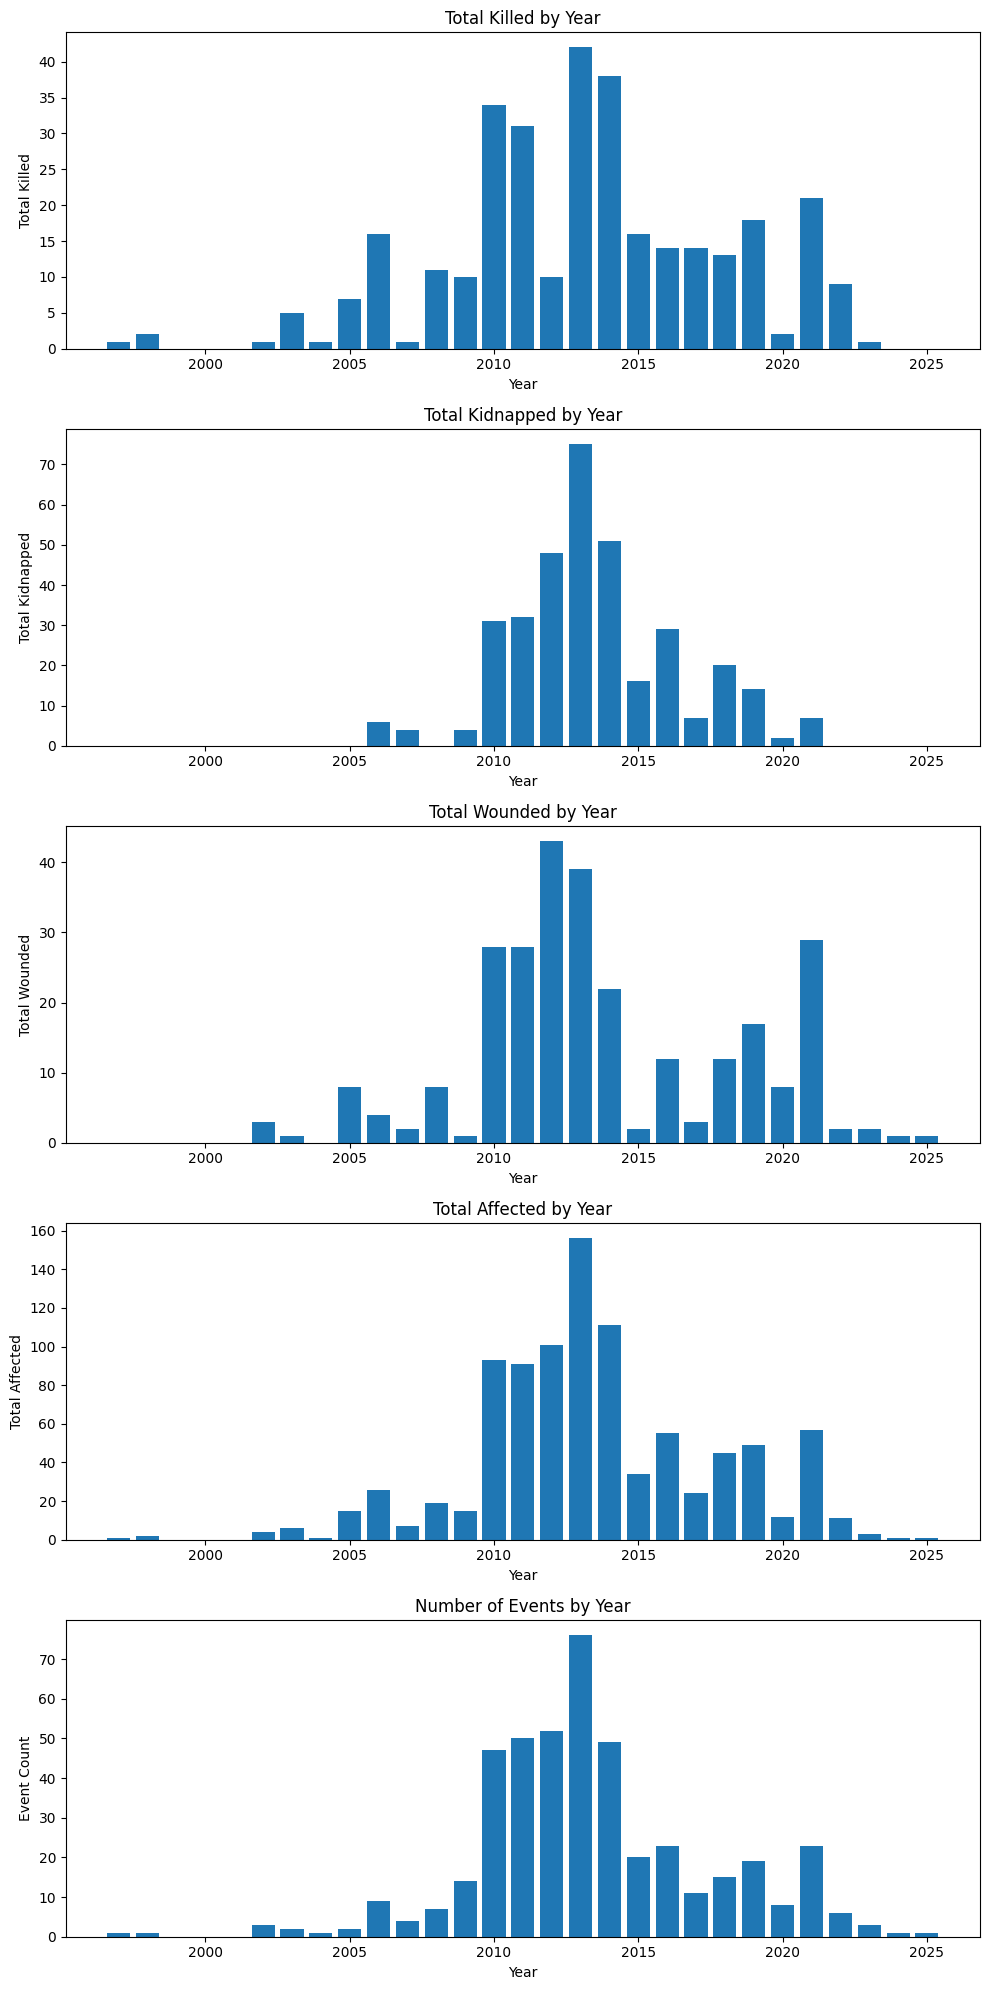

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'afghan' is your DataFrame and it's already loaded
# Replace this with your actual DataFrame if needed:
# afghan = pd.read_csv("your_data.csv")

# Create subplots (5 rows, 1 column)
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

# 1. Total Killed
afghan_by_year_killed = afghan.groupby("Year")["Total killed"].sum()
axes[0].bar(afghan_by_year_killed.index, afghan_by_year_killed)
axes[0].set_title("Total Killed by Year")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Total Killed")

# 2. Total Kidnapped
afghan_by_year_kidnapped = afghan.groupby("Year")["Total kidnapped"].sum()
axes[1].bar(afghan_by_year_kidnapped.index, afghan_by_year_kidnapped)
axes[1].set_title("Total Kidnapped by Year")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Total Kidnapped")

# 3. Total Wounded
afghan_by_year_wounded = afghan.groupby("Year")["Total wounded"].sum()
axes[2].bar(afghan_by_year_wounded.index, afghan_by_year_wounded)
axes[2].set_title("Total Wounded by Year")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Total Wounded")

# 4. Total Affected
afghan_by_year_affected = afghan.groupby("Year")["Total affected"].sum()
axes[3].bar(afghan_by_year_affected.index, afghan_by_year_affected)
axes[3].set_title("Total Affected by Year")
axes[3].set_xlabel("Year")
axes[3].set_ylabel("Total Affected")

# 5. Year-wise Event Count (Occurrences of each year)
afghan_by_year_count = afghan["Year"].value_counts().sort_index()
axes[4].bar(afghan_by_year_count.index, afghan_by_year_count)
axes[4].set_title("Number of Events by Year")
axes[4].set_xlabel("Year")
axes[4].set_ylabel("Event Count")

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Show the plots
plt.show()
